# Prueba de código de modulación.

Text(0.5, 0, 'Time')

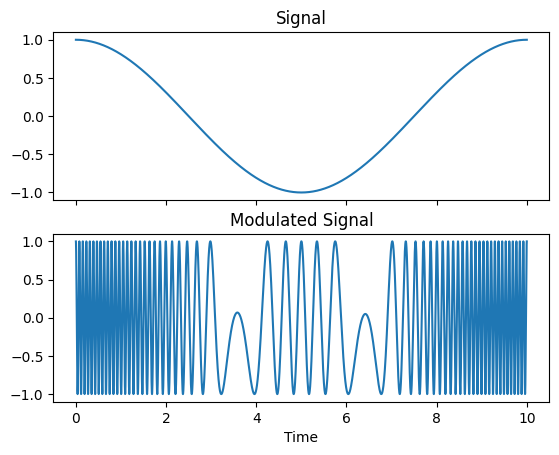

In [37]:
import numpy as np
import matplotlib.pyplot as plt

#%% signal generation
fn = 500 # Nyquist Frequency
fs = 2*fn # sampling frequency
t = np.arange(0, 10, 1/fs) # time axis

f_sig = 0.1 # base signal frequency
sig = np.cos(2*np.pi*f_sig*t) # base signal

#%% modulation
fc = 5 # carrier frequency
k = 0.05 # sensitivity
phi = 2*np.pi*fc*t + k*np.cumsum(sig) # phase

sig_mod = np.cos(phi) # modulated signal

#%% plotting
fig, ax = plt.subplots(2, 1, num=0, clear=True, sharex=True)

ax[0].set_title('Signal')
ax[0].plot(t, sig)

ax[1].set_title('Modulated Signal')
ax[1].plot(t, sig_mod)
ax[1].set_xlabel('Time')


In [3]:
#Cargamos embbedings
from gensim.models import Word2Vec
from gensim.models import FastText

emotion_list = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

poems_w2v = {}
poems_fst = {}

for e in emotion_list:
    w2v_lines = Word2Vec.load("embeddings_poems/w2v_model_"+e)
    fst_lines = FastText.load("embeddings_poems/fst_model_"+e)
    poems_w2v[e] = w2v_lines
    poems_fst[e] = fst_lines

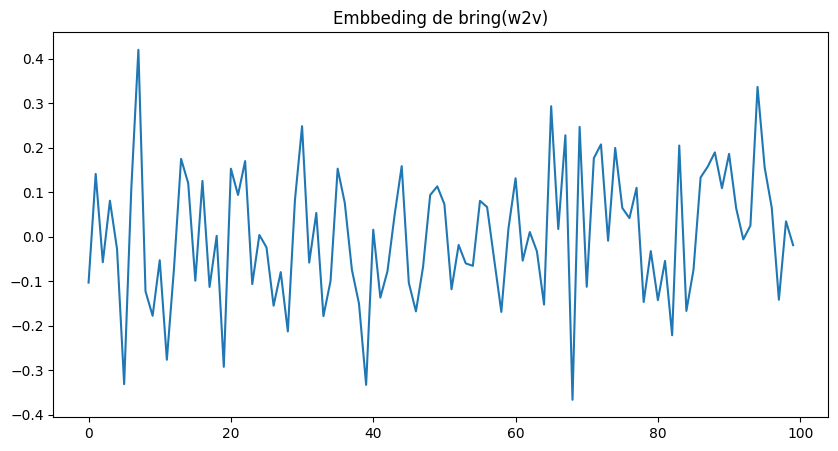

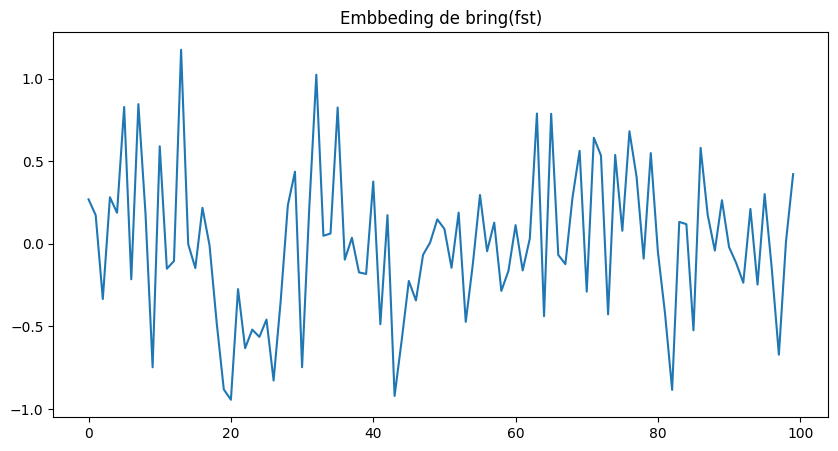

In [4]:
word = "bring"
emotion = "anger"
embbed_w2v = poems_w2v[emotion].wv.get_vector(word)
embbed_fst = poems_fst[emotion].wv.get_vector(word)

plt.figure(figsize=(10,5))
plt.title("Embbeding de "+word+"(w2v)")
plt.plot(embbed_w2v)

plt.figure(figsize=(10,5))
plt.title("Embbeding de "+word+"(fst)")
plt.plot(embbed_fst)

Text(0.5, 0, 'Time')

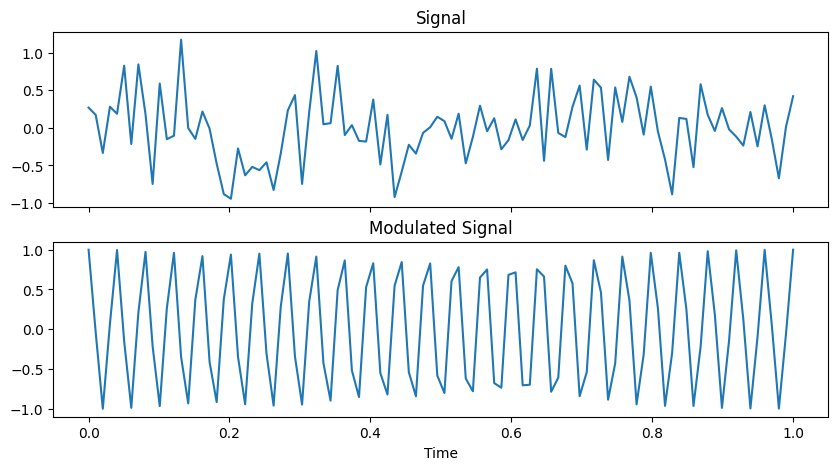

In [62]:
t = np.linspace(0,1,100) # time axis

fc = 25 # carrier frequency
k = 0.05 # sensitivity
phi = 2*np.pi*fc*t + k*np.cumsum(embbed_fst)

sig_mod = np.cos(phi) # modulated signal

#%% plotting
fig, ax = plt.subplots(2, 1, num=0, clear=True, sharex=True,figsize=(10,5))

ax[0].set_title('Signal')
ax[0].plot(t, embbed_fst)

ax[1].set_title('Modulated Signal')
ax[1].plot(t, sig_mod)
ax[1].set_xlabel('Time')

In [58]:
t = []
for x in [100,200,500,1000]:
    dt = np.arange(0,10,1/x)
    t.append(dt)

print(t)

[array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1

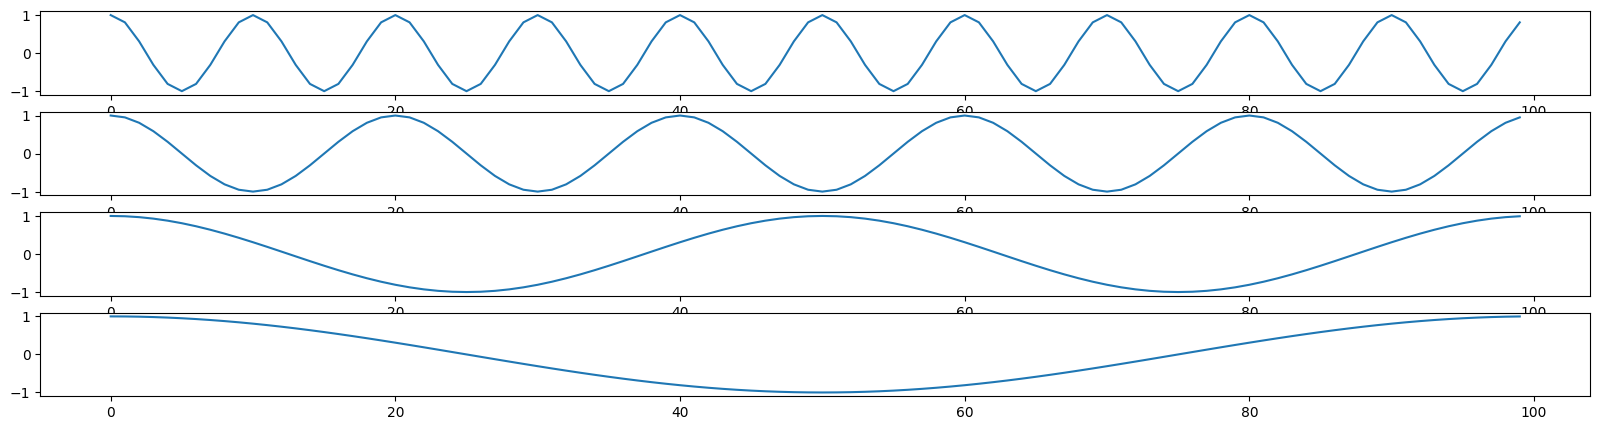

In [59]:
fc = 10
fig,ax = plt.subplots(len(t),figsize=(20,5))

for i in range(len(t)):
    phi = 2*np.pi*fc*t[i][0:100]
    sig_mod = np.cos(phi)
    ax[i].plot(sig_mod)

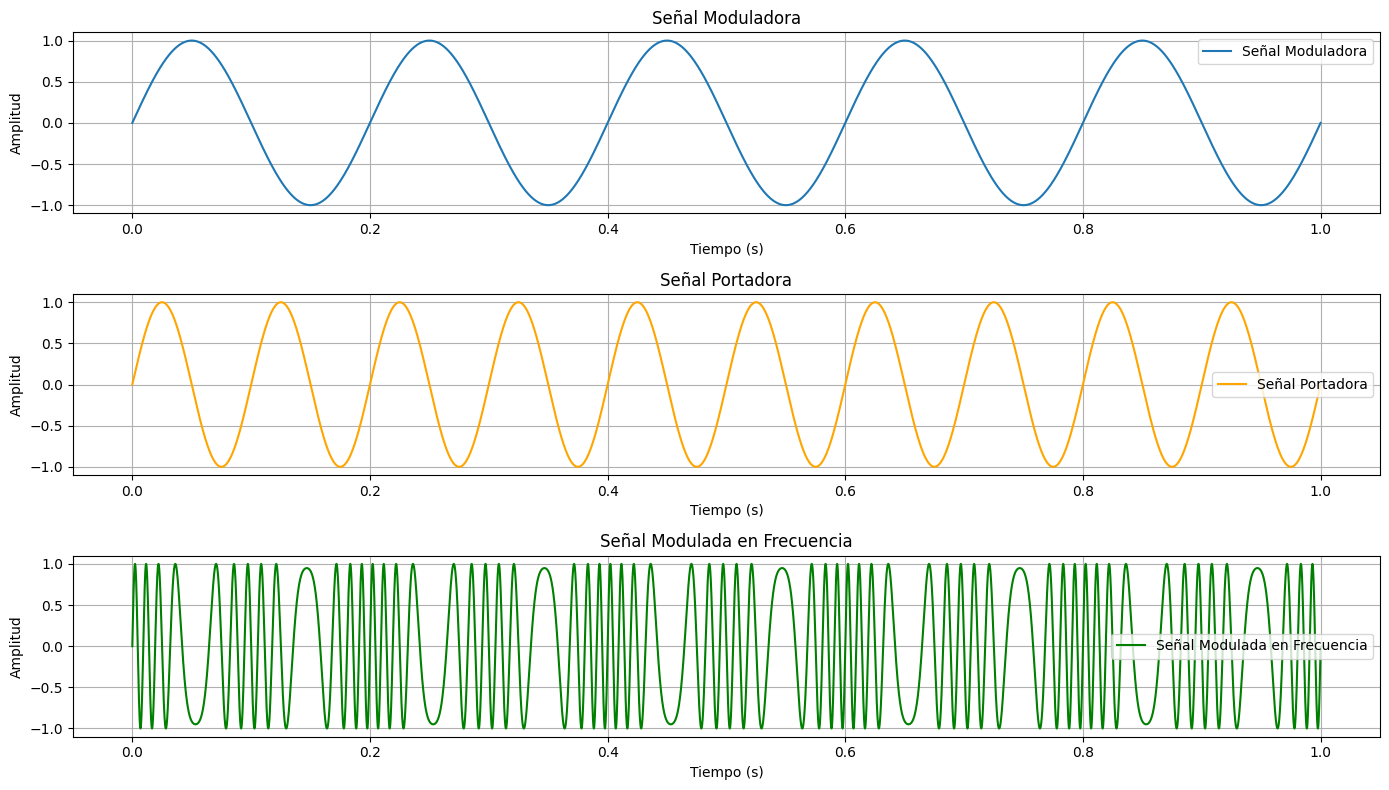

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
Fs = 100000        # Frecuencia de muestreo en Hz
T = 1           # Duración de la señal en segundos
t = np.linspace(0, T, int(Fs*T), endpoint=False)  # Vector de tiempo

# Parámetros de la señal portadora
f_c = 10        # Frecuencia de la portadora en Hz
A_c = 1.0          # Amplitud de la portadora

# Parámetros de la señal moduladora
f_m = 5         # Frecuencia de la señal moduladora en Hz
A_m = 1          # Amplitud de la señal moduladora
kf = 20           # Índice de modulación de frecuencia

# Señal moduladora
x_m = A_m * np.sin(2 * np.pi * f_m * t)

# Señal portadora
x_c = A_c * np.sin(2 * np.pi * f_c * t)

# Señal modulada en frecuencia
#x_fm = A_c * np.cos(2 * np.pi * f_c * t + kf*x_m)

x_fm = A_c * np.sin(2*np.pi*f_c*t+kf*x_m)

# Graficar las señales
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x_m, label='Señal Moduladora')
plt.title('Señal Moduladora')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, x_c, label='Señal Portadora', color='orange')
plt.title('Señal Portadora')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, x_fm, label='Señal Modulada en Frecuencia', color='green')
plt.title('Señal Modulada en Frecuencia')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


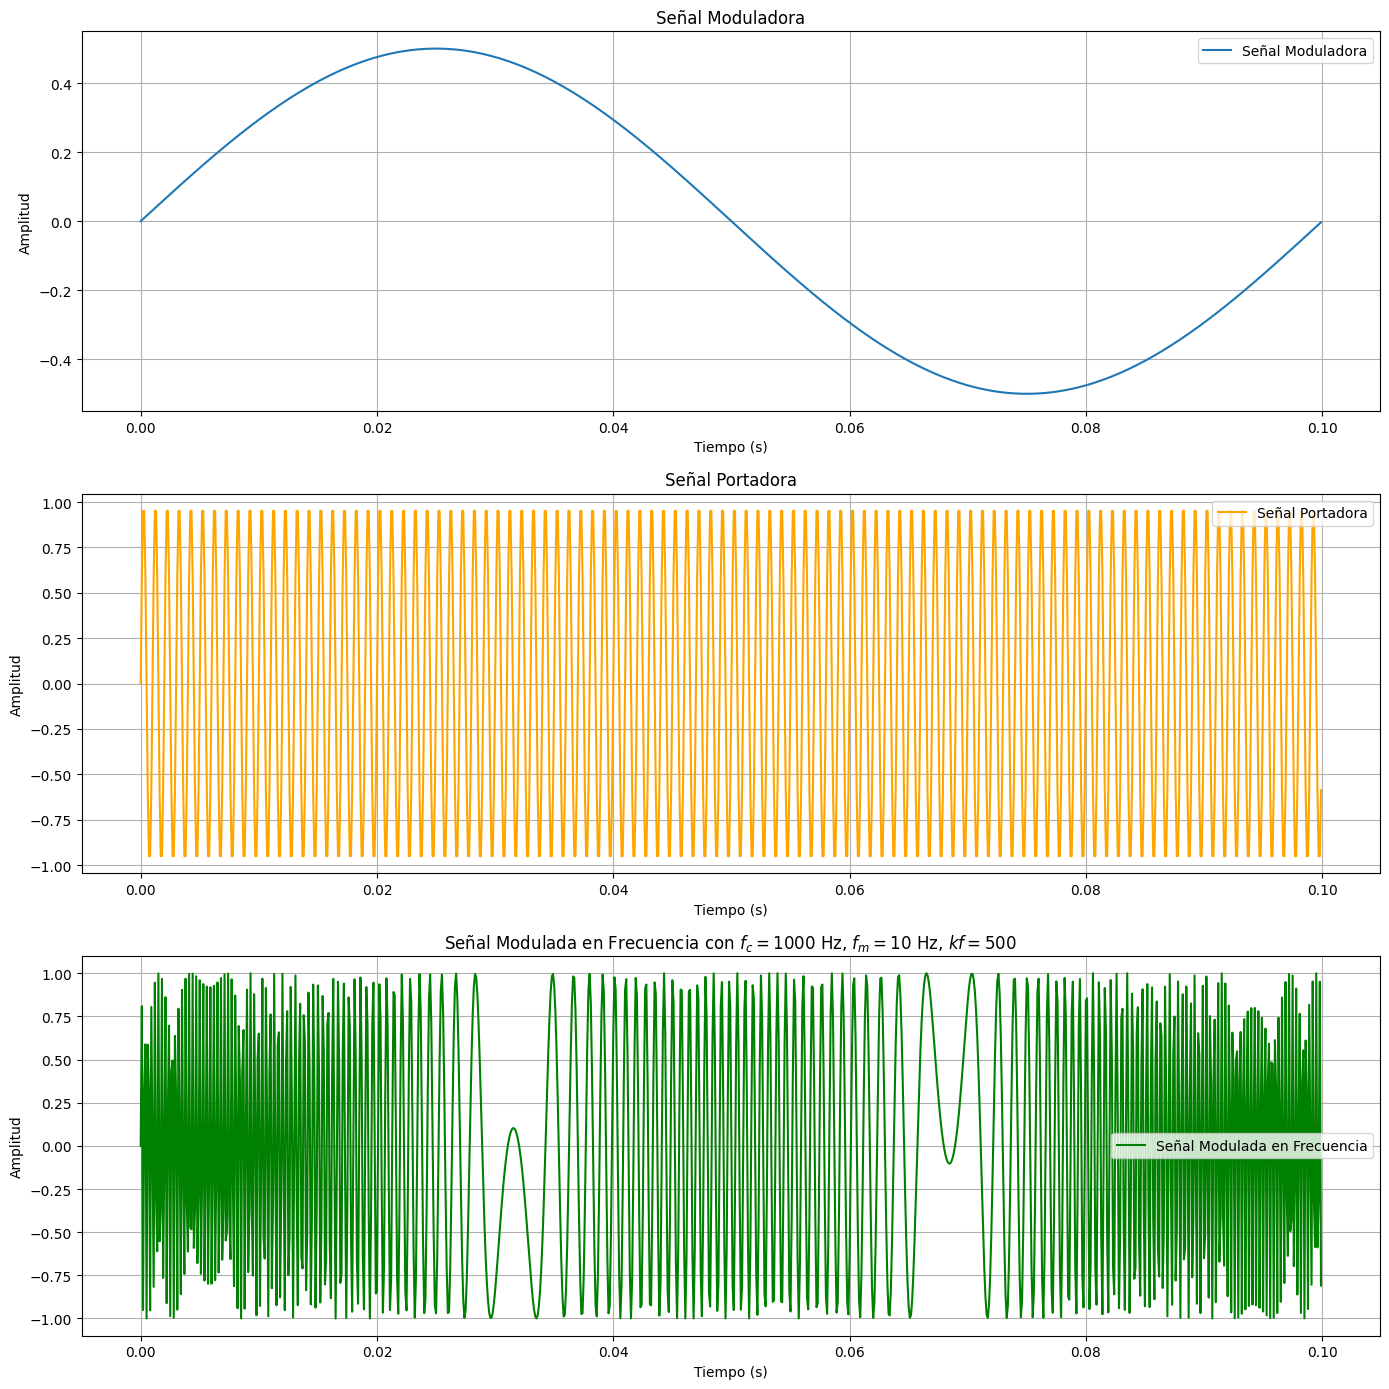

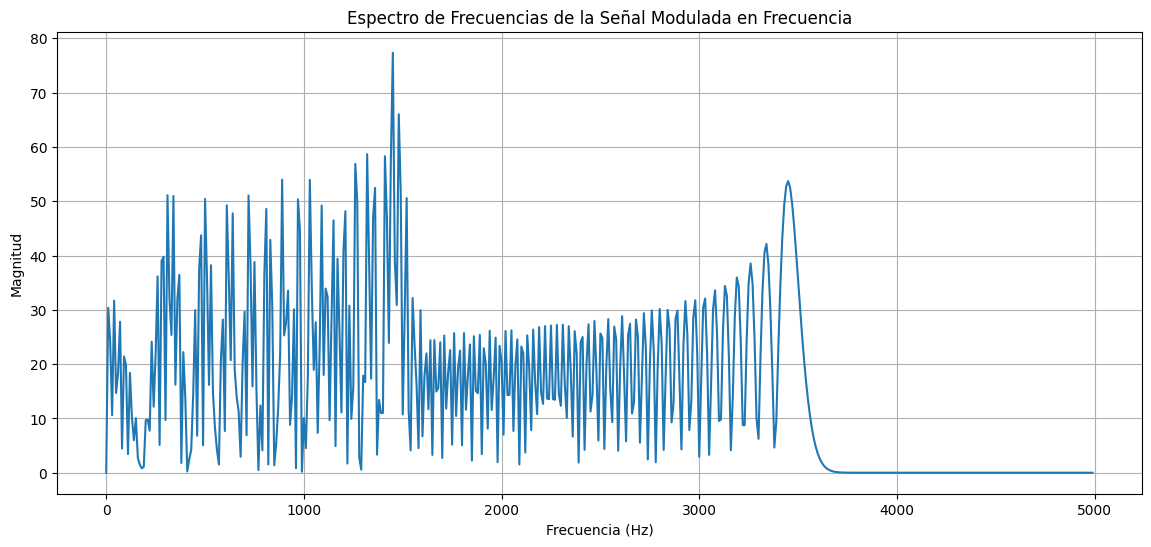

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
Fs = 10000         # Frecuencia de muestreo en Hz
T = 0.1            # Duración de la señal en segundos
t = np.linspace(0, T, int(Fs*T), endpoint=False)  # Vector de tiempo

# Parámetros de la señal portadora
f_c = 1000         # Frecuencia de la portadora en Hz (frecuencia baja)
A_c = 1.0          # Amplitud de la portadora

# Parámetros de la señal moduladora
f_m = 10           # Frecuencia de la señal moduladora en Hz (frecuencia baja)
A_m = 0.5          # Amplitud de la señal moduladora
kf = 500           # Índice de modulación de frecuencia

# Señal moduladora
x_m = A_m * np.sin(2 * np.pi * f_m * t)

# Señal portadora
x_c = A_c * np.sin(2 * np.pi * f_c * t)

# Señal modulada en frecuencia
x_fm = A_c * np.sin(2 * np.pi * f_c * t + kf * x_m)

# Graficar las señales
plt.figure(figsize=(14, 14))

# Graficar la señal moduladora
plt.subplot(3, 1, 1)
plt.plot(t, x_m, label='Señal Moduladora')
plt.title('Señal Moduladora')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Graficar la señal portadora
plt.subplot(3, 1, 2)
plt.plot(t, x_c, label='Señal Portadora', color='orange')
plt.title('Señal Portadora')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Graficar la señal modulada en frecuencia
plt.subplot(3, 1, 3)
plt.plot(t, x_fm, label='Señal Modulada en Frecuencia', color='green')
plt.title(f'Señal Modulada en Frecuencia con $f_c={f_c}$ Hz, $f_m={f_m}$ Hz, $kf={kf}$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# FFT de la señal modulada en frecuencia
X_fm = np.fft.fft(x_fm)
frecuencias = np.fft.fftfreq(len(t), 1/Fs)

# Graficar el espectro de frecuencias
plt.figure(figsize=(14, 6))
plt.plot(frecuencias[:len(frecuencias)//2], np.abs(X_fm)[:len(X_fm)//2])
plt.title('Espectro de Frecuencias de la Señal Modulada en Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()
plt.show()


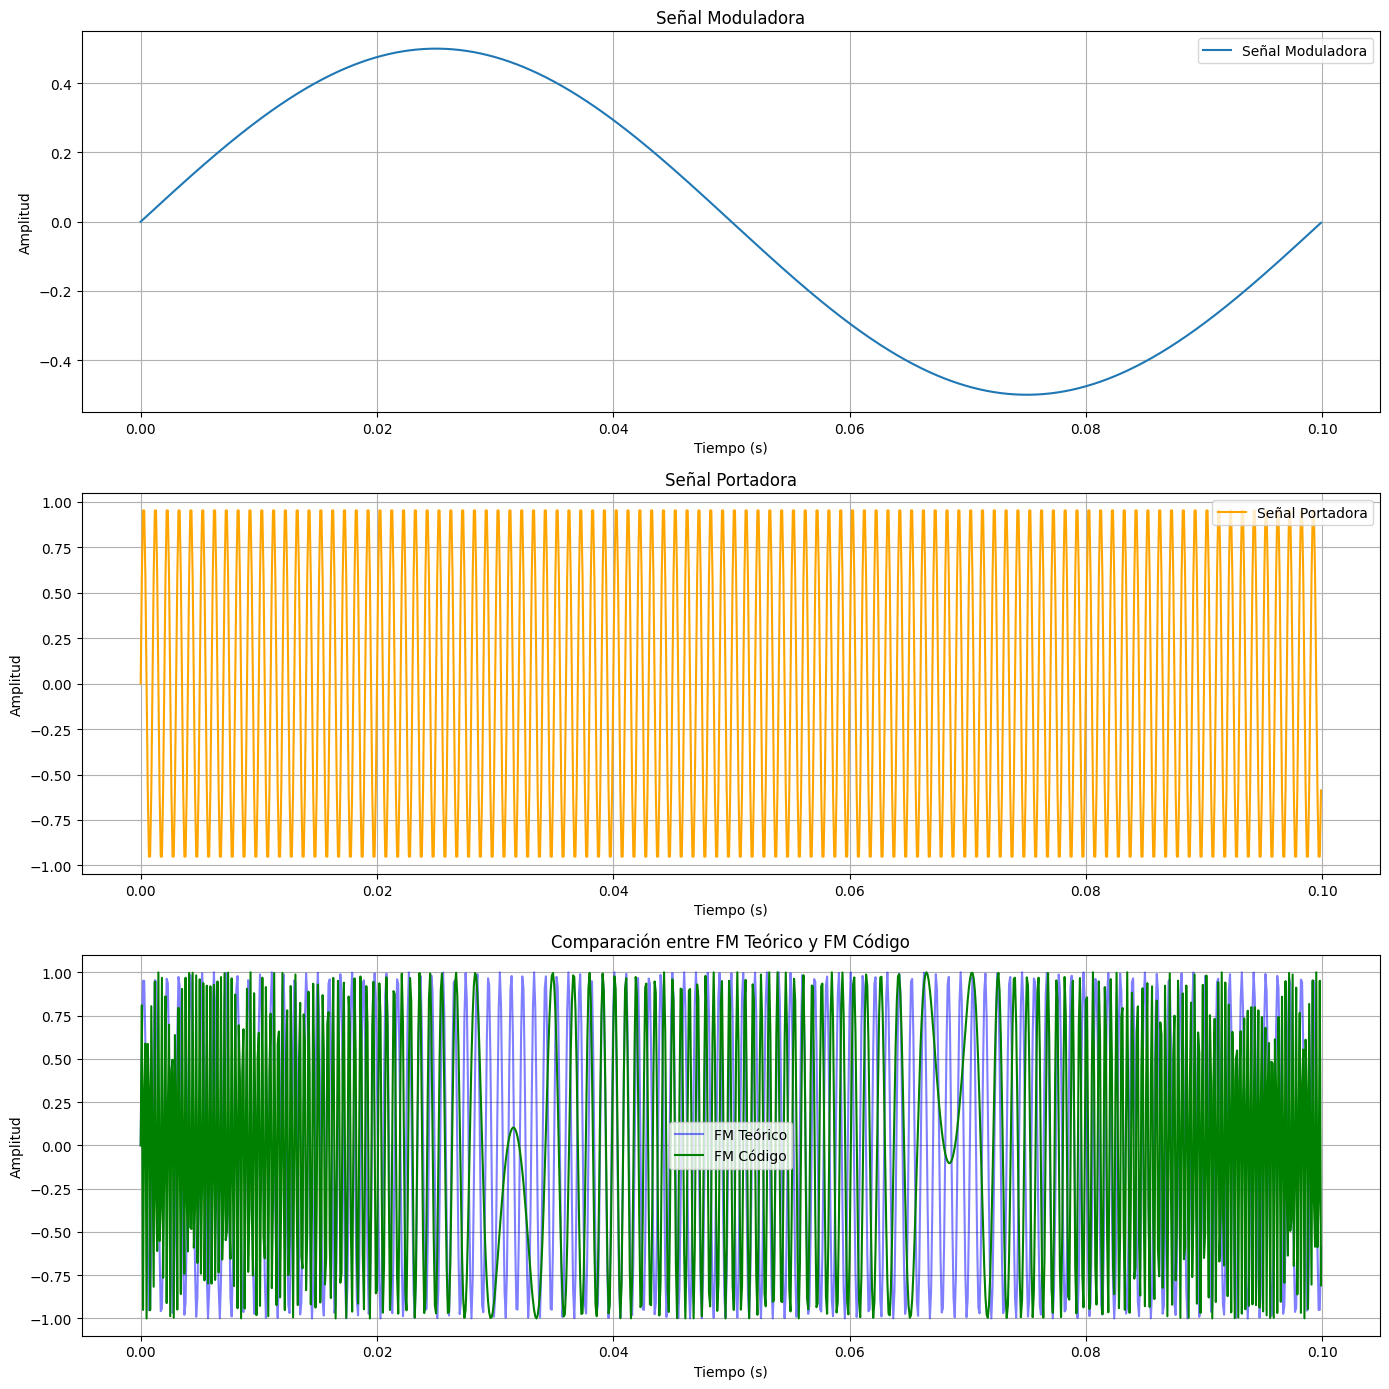

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
Fs = 10000         # Frecuencia de muestreo en Hz
T = 0.1            # Duración de la señal en segundos
t = np.linspace(0, T, int(Fs*T), endpoint=False)  # Vector de tiempo

# Parámetros de la señal portadora
f_c = 1000         # Frecuencia de la portadora en Hz
A_c = 1.0          # Amplitud de la portadora

# Parámetros de la señal moduladora
f_m = 10           # Frecuencia de la señal moduladora en Hz
A_m = 0.5          # Amplitud de la señal moduladora
kf = 500           # Índice de modulación de frecuencia

# Señal moduladora
x_m = A_m * np.sin(2 * np.pi * f_m * t)

# Señal portadora
x_c = A_c * np.sin(2 * np.pi * f_c * t)

# Señal modulada en frecuencia usando la fórmula teórica
x_fm_teorico = A_c * np.sin(2 * np.pi * f_c * t + kf * np.cumsum(x_m) * (t[1] - t[0]))

# Señal modulada en frecuencia usando la fórmula simplificada
x_fm_codigo = A_c * np.sin(2 * np.pi * f_c * t + kf * x_m)

# Graficar las señales
plt.figure(figsize=(14, 14))

# Graficar la señal moduladora
plt.subplot(3, 1, 1)
plt.plot(t, x_m, label='Señal Moduladora')
plt.title('Señal Moduladora')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Graficar la señal portadora
plt.subplot(3, 1, 2)
plt.plot(t, x_c, label='Señal Portadora', color='orange')
plt.title('Señal Portadora')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Graficar las señales modulada en frecuencia teórica y simplificada
plt.subplot(3, 1, 3)
plt.plot(t, x_fm_teorico, label='FM Teórico', color='blue', alpha=0.5)
plt.plot(t, x_fm_codigo, label='FM Código', color='green')
plt.title('Comparación entre FM Teórico y FM Código')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
